In [1]:
#import dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
from scipy.stats import linregress

#Read in file path
cancer_path=Path('Resources/cancer_reg.csv')

#Convert the CSV to Dataframe
cancer_df=pd.read_csv(cancer_path,encoding="ISO-8859-1")

In [2]:
#Update the column headers to be more readable.
cancer_df[["County","State"]]=cancer_df["Geography"].str.split(",",expand=True)
cancer_reorg_df=cancer_df.rename(columns={"County":"County","State":"State","avgAnnCount":"Cancer_Incidence_Count",
                                          "avgDeathsPerYear":"Average_Deaths_per_Year","Geography":"County_State",
                                          "popEst2015":"Population_Estimate_2015","MedianAge":"Median_Age",
                                          "MedianAgeMale":"Median_Age_Male","MedianAgeFemale":"Median_Age_Female",
                                          "medIncome":"Median_Income","povertyPercent":"Poverty_Rate",
                                          "AvgHouseholdSize":"Average_Household_Size","PercentMarried":"Percent_of_Population_Married",
                                          "PctEmployed16_Over":"Percent_Employed_Over_16","PctUnemployed16_Over":"Percent_Unemployed_Over_16",
                                          "PctPrivateCoverage":"Private_Insurance_%","PctPublicCoverage"
                                          :"Public_Insurance_%","PctWhite":"Pop_Percent_White","PctBlack":"Pop_Percent_Black",
                                          "PctAsian":"Pop_Percent_Asian","PctOtherRace":"Pop_Percent_Other_Race"})
final_cancer_df=cancer_reorg_df[["County","State","Cancer_Incidence_Count","Average_Deaths_per_Year",
                                 "Median_Income","Population_Estimate_2015","Poverty_Rate","Percent_of_Population_Married","Percent_Employed_Over_16","Percent_Unemployed_Over_16",
                                 "Median_Age","Median_Age_Male","Median_Age_Female","Public_Insurance_%",
                                 "Private_Insurance_%","Pop_Percent_White","Pop_Percent_Black","Pop_Percent_Asian","Pop_Percent_Other_Race"]]

In [7]:
final_cancer_df.to_csv("Resources/cancer_dataset.csv",index=False,encoding="ISO-8859-1")

PermissionError: [Errno 13] Permission denied: 'Resources/cancer_dataset.csv'

In [ ]:
#Load CSV and create a dataframe
f = 'Resources\\cancer_dataset.csv'
cancer_df = pd.read_csv(f,encoding = "ISO-8859-1")

#Converting three columns to integars for calculations.
cancer_df=cancer_df.astype({"Percent_of_Population_Married":int,"Average_Deaths_per_Year":int,"Population_Estimate_2015":int})

#Creating new column called Percent Cancer Deaths.
cancer_df["Cancer_Deaths_Percent"]=(cancer_df["Average_Deaths_per_Year"]/cancer_df["Cancer_Incidence_Count"])*100
cancer_df.head()

,County,State,Cancer_Incidence_Count,Average_Deaths_per_Year,Median_Income,Population_Estimate_2015,Poverty_Rate,Percent_of_Population_Married,Percent_Employed_Over_16,Percent_Unemployed_Over_16,Median_Age,Median_Age_Male,Median_Age_Female,Public_Insurance_%,Private_Insurance_%,Pop_Percent_White,Pop_Percent_Black,Pop_Percent_Asian,Pop_Percent_Other_Race,Cancer_Deaths_Percent
0,Kitsap County,Washington,1397.0,469,61898,260131,11.2,52,51.9,8.0,39.3,36.9,41.7,32.9,75.1,81.780529,2.594728,4.821857,1.843479,33.571940
1,Kittitas County,Washington,173.0,70,48127,43269,18.6,44,55.9,7.8,33.0,32.2,33.7,31.1,70.2,89.228509,0.969102,2.246233,3.741352,40.462428
2,Klickitat County,Washington,102.0,50,49348,21026,14.6,54,45.9,7.0,45.0,44.0,45.8,42.1,63.7,90.922190,0.739673,0.465898,2.747358,49.019608
3,Lewis County,Washington,427.0,202,44243,75882,17.1,52,48.3,12.1,42.8,42.2,43.4,45.3,58.4,91.744686,0.782626,1.161359,1.362643,47.306792
4,Lincoln County,Washington,57.0,26,49955,10321,12.5,57,48.2,4.8,48.3,47.8,48.9,44.0,61.6,94.104024,0.270192,0.665830,0.492135,45.614035


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression ( x_values, y_values, text_coordinates):
      (slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
      regress_values=x_values*slope+intercept
      line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
      
      plt.plot(x_values,regress_values,"r-")
      plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
      print(f"The r value is: {round(rvalue,3)}",f"The p value is: {(pvalue)}")

Cody's Code

In [ ]:
#Create a new dataframe with the columns state, Cancer_Incidence_Count,Percent_Unemployed_Over_16 . 
unemployment_df=cancer_df.loc[:,["Cancer_Incidence_Count","Percent_Unemployed_Over_16","State"]]

#Create a new dataframe that shows the totals by state for Cancer Incidence and Average unemployment percentage. 
totals_df = unemployment_df.groupby('State').agg({'Cancer_Incidence_Count': 'sum'})


In [ ]:
# Create a dataframe that displays the mean unemployment percentage by state. 
grouped_df = unemployment_df.groupby('State')

# Calculate the sum and mean for each group
mean_values = grouped_df['Percent_Unemployed_Over_16'].mean()
sum_values = grouped_df['Cancer_Incidence_Count'].sum()

# Create a new DataFrame to store the results
result_df = pd.DataFrame({'Cancer Incidence Count':sum_values,
    'Average Unemployment Percentage': mean_values})

The r value is: 0.013 The p value is: 0.9277924907985875


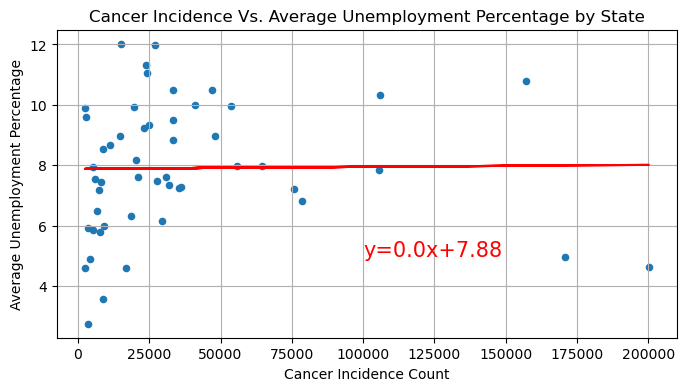

In [ ]:
# Create a scatterplot that displays the correlation between the average unemployment percentage and cancer incidence by state
result_df.plot(kind="scatter", x="Cancer Incidence Count", y="Average Unemployment Percentage", grid=True, figsize=(8,4),
              title="Cancer Incidence Vs. Average Unemployment Percentage by State")
plot_linear_regression(result_df["Cancer Incidence Count"],result_df["Average Unemployment Percentage"],(100000,5))
plt.savefig("Images/Unemployment.png")
plt.show()


In [ ]:
#Create a new dataframe with the columns avgDeathsPerYear,State PctWhite, PctBlack, PctAsian, and PctOtherRace. 
working1_df=cancer_df.loc[:,["Cancer_Incidence_Count","Average_Deaths_per_Year","State"]]

In [ ]:
unique_values1 = working1_df['State'].unique()

new_df = pd.DataFrame({'State': unique_values1})

,State
0,Washington
1,West Virginia
2,Wisconsin
3,Nebraska
4,Nevada
5,New Hampshire
6,New Jersey
7,New Mexico
8,New York
9,Virginia


In [ ]:
#Create a new dataframe that shows the totals by state for Cancer Incidence and Average Deaths per year. 
grouped_cancer_df = working1_df.groupby('State').agg({'Cancer_Incidence_Count': 'sum', 'Average_Deaths_per_Year': 'sum'})

grouped_cancer_df.rename(columns={'Cancer_Incidence_Count': 'Cancer Incidence Totals','Average_Deaths_per_Year':'Average Death Totals per Year','Percentages':'Percentages'}, inplace=True)

In [ ]:
# Calculate the percentage of Average Deaths that resulted from total incidence by State.
grouped_cancer_df['Percentages'] = (grouped_cancer_df['Average Death Totals per Year'] / grouped_cancer_df['Cancer Incidence Totals']) * 100

,Cancer Incidence Totals,Average Death Totals per Year,Percentages
State,,,
Alabama,24182.000000,9984,41.286908
Alaska,2512.000000,881,35.071656
Arizona,27051.000000,10814,39.976341
Arkansas,14762.000000,6545,44.336811
California,156982.000000,56853,36.216254
Colorado,21001.000000,7134,33.969811
Connecticut,20304.000000,6783,33.407210
Delaware,5167.000000,1894,36.655700
District of Columbia,2881.000000,1084,37.625824


In [ ]:
state_names=["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

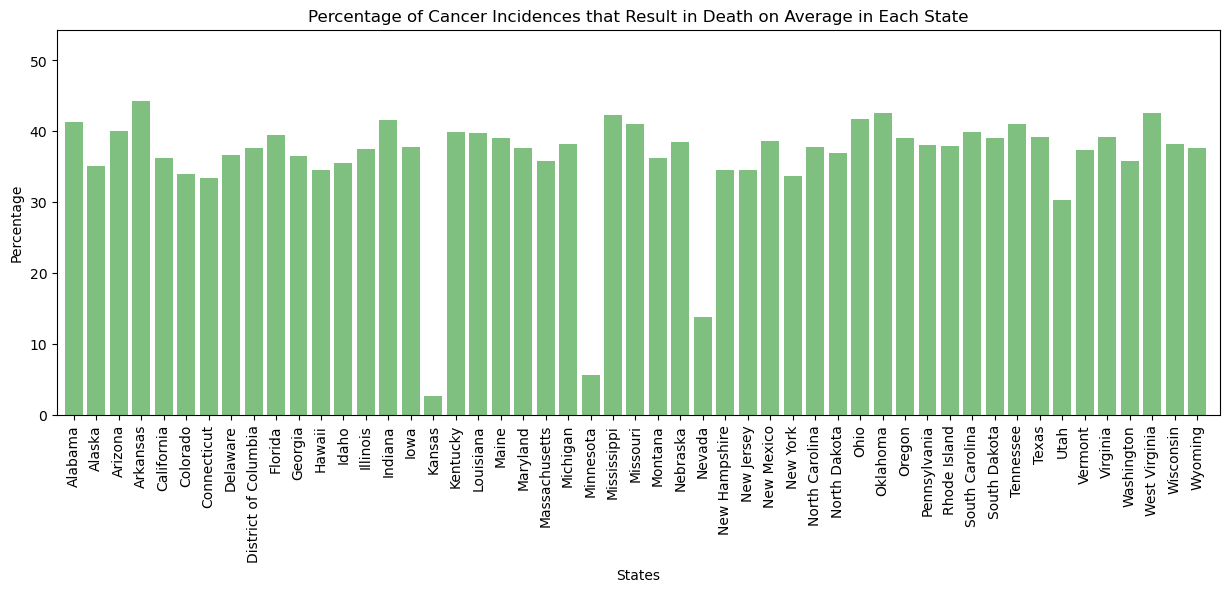

In [ ]:
#Create a bar graph showing the percentages of cancer incidences that result in death by state. 
x_axis = np.arange(len(grouped_cancer_df))
tick_locations = [value for value in x_axis] 
plt.figure(figsize=(15,5))
plt.bar(x_axis,grouped_cancer_df["Percentages"], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations,state_names, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(grouped_cancer_df["Percentages"])+10)
plt.title("Percentage of Cancer Incidences that Result in Death on Average in Each State")
plt.xlabel("States")
plt.ylabel("Percentage")
plt.savefig("Images/State_Cancer.png")
plt.show()

Sammie's Code

In [ ]:
#Setting up bins for categories of marriage percentiles and making a copy of the original dataset.
marriage_bins=[20,25,30,35,40,45,50,55,60,65,70,75]
labels=["20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%","55-60%","60-65%","65-70%","70-75%"]
marriage_df=cancer_df.copy()

In [ ]:
#Binning the data by marriage percent.
marriage_df["Percent_of_Population_Married"]=pd.cut(marriage_df["Cancer_Incidence_Count"],marriage_bins,labels=labels)

#Finding the average death rate from cancer and average age of population in each category of marriage percent.
death_rates_by_marriage=marriage_df.groupby(["Percent_of_Population_Married"])["Cancer_Deaths_Percent"].mean()
age_marriage=marriage_df.groupby(["Percent_of_Population_Married"])["Median_Age"].mean()

In [ ]:
#Adding the age and death rates from cancer to a dataframe.
death_and_marriage=pd.DataFrame({"Average Cancer Death Rate":death_rates_by_marriage,
                                 "Average Age of Population":age_marriage})

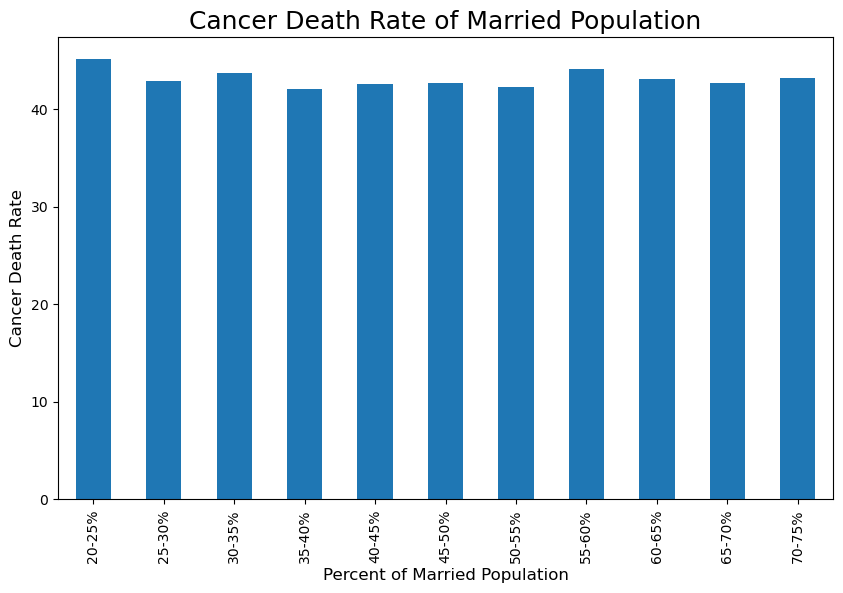

In [ ]:
#Plotting a barchart showing the average death rate from cancer for each category of marriage percentage.
death_and_marriage["Average Cancer Death Rate"].plot(kind="bar",figsize=(10,6)) 

#Chart labels
plt.title("Cancer Death Rate of Married Population",fontsize=18) 
plt.xlabel("Percent of Married Population",fontsize=12)
plt.ylabel("Cancer Death Rate",fontsize=12)

#Saving image to folder
plt.savefig("Images/Death_Marriage.png")
plt.show()


Jake's Code

In [ ]:
#create new dataframe
insurance_df = cancer_df.loc[:,["State", "Private_Insurance_%", "Public_Insurance_%", "Average_Deaths_per_Year", "Cancer_Deaths_Percent"]]

In [ ]:
#rename column names and save them to the dataframe
insurance_df.rename(columns={'Private_Insurance_%': 'Private Insurance Percentage','Public_Insurance_%': 'Public Insurance Percentage', 'Average_Deaths_per_Year': 'Average Deaths per Year', 'Cancer_Deaths_Percent': 'Cancer Deaths Percentage'}, inplace=True)

In [ ]:
#find unique values for states
unique_values = insurance_df['State'].unique()

state_df = pd.DataFrame({'State': unique_values})

In [ ]:
#Final dataset sorted with unique states and mean
final_df = insurance_df.groupby('State').agg({'Private Insurance Percentage': 'median', 'Public Insurance Percentage': 'median', 'Cancer Deaths Percentage': 'median'}, inplace=True)

In [ ]:
final_df['Uninsured'] = (100 - (final_df['Private Insurance Percentage'] + final_df['Public Insurance Percentage'])) * -1

The r value is: -0.198 The p value is: 0.1639958103551399


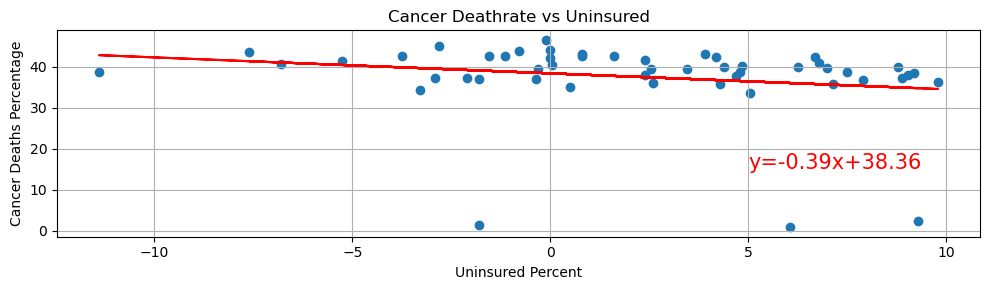

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(final_df['Uninsured'], final_df['Cancer Deaths Percentage'])
plt.xlabel('Uninsured Percent')
plt.ylabel('Cancer Deaths Percentage')
plt.title('Cancer Deathrate vs Uninsured')
plt.grid(True)
plt.tight_layout()
plot_linear_regression(final_df["Uninsured"],final_df["Cancer Deaths Percentage"],(5,15))
plt.savefig("Images/Insurance_Cancer.png")
plt.show()

Johnny's Code

In [ ]:
#Create a new dataframe with the columns avgDeathsPerYear per state
DPS_df= cancer_df.loc[:,["Median_Income" , "Average_Deaths_per_Year","State"]]

In [ ]:
unique_values2 = DPS_df['State'].unique()

new1_df = pd.DataFrame({'State': unique_values2})

In [ ]:
#Create a new dataframe that shows the totals by state for Median Income and Average Deaths per year.
grouped_income_df = DPS_df.groupby('State').agg({'Median_Income': 'mean' , 'Average_Deaths_per_Year': 'sum'})

The r value is: -0.087 The p value is: 0.5451323255089155


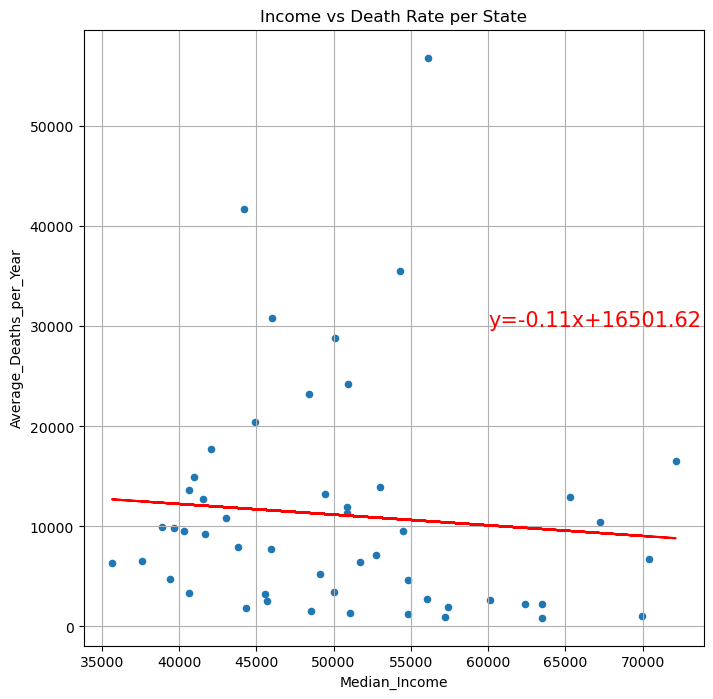

In [ ]:
#Create a scatter plot showing the median income and average deaths per year in each state.
grouped_income_df.plot(kind="scatter", x="Median_Income", y="Average_Deaths_per_Year", grid=True, figsize=(8,8),
              title="Income vs Death Rate per State")
plot_linear_regression(grouped_income_df["Median_Income"],grouped_income_df["Average_Deaths_per_Year"],(60000,30000))
plt.savefig("Images/Income_Cancer.png")

In [ ]:
#Create a new dataframe with the columns Median age and poverty rate per state
PM_df= cancer_df.loc[:,["Median_Age" , "Poverty_Rate","State"]]

Poverty_vs_MAge_df = PM_df.groupby('State').agg({'Poverty_Rate': 'mean' , 'Median_Age': 'mean'})

The r value is: -0.118 The p value is: 0.40947294217179186


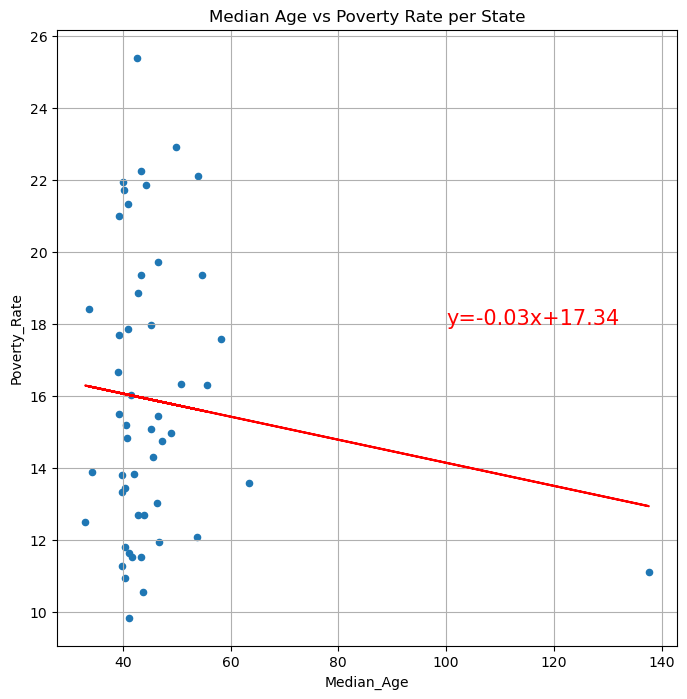

In [ ]:
Poverty_vs_MAge_df.plot(kind="scatter", x="Median_Age", y="Poverty_Rate", grid=True, figsize=(8,8),
              title="Median Age vs Poverty Rate per State")
plot_linear_regression(Poverty_vs_MAge_df["Median_Age"],Poverty_vs_MAge_df["Poverty_Rate"],(100,18))
plt.savefig("Images/Poverty_Cancer.png")